## 🟠**FASE IV: RF MODEL**🟠

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings #Advertencias
warnings.filterwarnings('ignore')

# Carga de parquet preprocesado
path = 'monopoly_cleaned_parquet'
monopoly = pd.read_parquet(path)

In [2]:
monopoly.shape

(51121, 66)

In [3]:
monopoly.head(10)

,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,...,ColL2AC_avg,ColL2CC_avg,ColMx_avg,PagoNac_avg,PagoInt_avg,EeccNac_avg,EeccInt_avg,UsoL1_avg,UsoL2_avg,UsoLI_avg
0,160.0,1.0,13.0,43.0,601932.8,130.0,1.0,1.0,0.0,0.0,...,0.0,34699.666667,0.000000,29333.333333,0.0,908079.416667,0.000000,913045.583333,53874.250000,0.000000
1,160.0,0.0,13.0,46.0,143640.0,69.0,1.0,0.0,0.0,0.0,...,0.0,17597.250000,45699.212500,167416.666667,0.0,460136.500000,58.904167,428734.833333,119963.916667,84.508333
2,170.0,0.0,13.0,45.0,929106.0,24.0,1.0,1.0,0.0,0.0,...,0.0,0.000000,0.000000,68325.750000,0.0,8510.750000,0.000000,25294.500000,0.000000,0.000000
3,151.0,0.0,13.0,46.0,172447.0,134.0,0.0,1.0,0.0,1.0,...,0.0,2706.500000,0.000000,57083.333333,0.0,341916.833333,0.000000,344417.500000,31825.250000,0.000000
4,170.0,0.0,13.0,46.0,805250.0,116.0,0.0,1.0,1.0,0.0,...,0.0,6227.666667,0.000000,291317.166667,0.0,291684.500000,0.000000,83849.250000,402597.666667,0.000000
5,170.0,0.0,13.0,47.0,707664.0,67.0,1.0,1.0,0.0,0.0,...,0.0,30817.583333,0.000000,67995.500000,0.0,66314.083333,0.000000,761.500000,68509.250000,0.000000
6,811.0,0.0,13.0,48.0,1022833.0,21.0,1.0,0.0,1.0,0.0,...,0.0,29313.500000,0.000000,229371.416667,0.0,360648.416667,0.000000,384923.583333,72453.333333,0.000000
7,170.0,0.0,13.0,46.0,544956.4,69.0,0.0,1.0,1.0,0.0,...,0.0,5070.750000,0.000000,21030.500000,0.0,104602.666667,0.000000,108996.833333,30391.000000,0.000000
8,170.0,0.0,13.0,49.0,1171066.0,33.0,0.0,0.0,0.0,0.0,...,0.0,14785.000000,5715.304167,46666.666667,0.0,479423.416667,10.843333,479423.416667,24828.666667,10.843333
9,170.0,1.0,13.0,44.0,964387.0,23.0,1.0,1.0,0.0,0.0,...,0.0,0.000000,0.000000,354215.083333,0.0,55744.750000,0.000000,50686.916667,16111.000000,0.000000


### 🎄MODELO RANDOM FOREST🎄

## 🔶REG--MODELS 

#### ➡️MODEL 1 🎄-REGRESSION

1️⃣ - `Definición de variables:`

In [4]:
X = pd.DataFrame(monopoly.drop(columns=['Renta']))
X.head()

,Subsegmento,Sexo,Region,Edad,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,...,ColL2AC_avg,ColL2CC_avg,ColMx_avg,PagoNac_avg,PagoInt_avg,EeccNac_avg,EeccInt_avg,UsoL1_avg,UsoL2_avg,UsoLI_avg
0,160.0,1.0,13.0,43.0,130.0,1.0,1.0,0.0,0.0,1.0,...,0.0,34699.666667,0.0000,29333.333333,0.0,908079.416667,0.000000,913045.583333,53874.250000,0.000000
1,160.0,0.0,13.0,46.0,69.0,1.0,0.0,0.0,0.0,1.0,...,0.0,17597.250000,45699.2125,167416.666667,0.0,460136.500000,58.904167,428734.833333,119963.916667,84.508333
2,170.0,0.0,13.0,45.0,24.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.000000,0.0000,68325.750000,0.0,8510.750000,0.000000,25294.500000,0.000000,0.000000
3,151.0,0.0,13.0,46.0,134.0,0.0,1.0,0.0,1.0,0.0,...,0.0,2706.500000,0.0000,57083.333333,0.0,341916.833333,0.000000,344417.500000,31825.250000,0.000000
4,170.0,0.0,13.0,46.0,116.0,0.0,1.0,1.0,0.0,1.0,...,0.0,6227.666667,0.0000,291317.166667,0.0,291684.500000,0.000000,83849.250000,402597.666667,0.000000


In [5]:
Y = pd.DataFrame(monopoly['Renta'])
Y.head()

,Renta
0,601932.8
1,143640.0
2,929106.0
3,172447.0
4,805250.0


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.8, random_state=52)

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tools.eval_measures import rmse

2️⃣ - `Modelo:`

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
modelo_rf = RandomForestRegressor(n_estimators=100, max_depth=10)

3️⃣ - `Entrenamiento:`

In [10]:
modelo_rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10)

4️⃣ - `Predicción:`

In [11]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_rf.predict(X_test)

5️⃣ - `Métricas:` Evaluamos el desempeño del modelo a través del cálculo de métricas.

In [12]:
import math

In [13]:
MAE_RF = mean_absolute_error(Y_test, Y_hat)
MSE_RF =  mean_squared_error(Y_test, Y_hat)
RMSE_RF = math.sqrt(mean_squared_error(Y_test, Y_hat))
r2_RF = r2_score(Y_test, Y_hat)

print("MAE: %.2f" % MAE_RF)
print("MSE: %.2f" % MSE_RF)
print("RMSE: %.2f" % RMSE_RF)
print('r2: %.2f' % r2_RF)

MAE: 168651.99
MSE: 77068008835.84
RMSE: 277611.25
r2: 0.42


En el modelo 1 representa un desempeño razonable con un margen de MAE de 168,651.99 y un R^2 de 0.42 indican una capacidad de predicción moderada, pero el alto MSE y RMSE

#### ➡️MODEL 2 🎄-REGRESSION

2️⃣ - `Modelo:`

In [14]:
modelo_rf2 = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2,min_samples_leaf=2, max_features='sqrt')

3️⃣ - `Entrenamiento:`

In [15]:
modelo_rf2.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2)

4️⃣ - `Predicción:`

In [16]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_rf2.predict(X_test)

5️⃣ - `Métricas:`

In [17]:
MAE_RF = mean_absolute_error(Y_test, Y_hat)
MSE_RF =  mean_squared_error(Y_test, Y_hat)
RMSE_RF = math.sqrt(mean_squared_error(Y_test, Y_hat))
r2_RF = r2_score(Y_test, Y_hat)

print("MAE2_M2: %.2f" % MAE_RF)
print("MSE2_M2: %.2f" % MSE_RF)
print("RMSE_M2: %.2f" % RMSE_RF)
print('r2_M2: %.2f' % r2_RF)

MAE2_M2: 172993.37
MSE2_M2: 80540684148.50
RMSE_M2: 283796.91
r2_M2: 0.39


(Malo) Modelo 2 tiene un rendimiento similar al primer modelo, ambos modelos tiene metricas en R2 casi en un mismo rango, si bien son capaces de predecir en cierta medida, todavía hay espacio para la mejora, no es recomendable usar este modelo

#### ➡️MODEL 3 🎄-REGRESSION

2️⃣ - `Modelo:`

In [19]:
# HIPERPARAMETROS -- GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Crear una instancia del modelo Random Forest
modelo = RandomForestRegressor(random_state=123)

# GridSearchCV -- mejor combinación de hiperparámetros
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Obtener la mejor combinación de hiperparámetros
better_params = grid_search.best_params_
better_params

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [20]:
# Crear un modelo Random Forest con los mejores parámetros
modelo_rf3 = RandomForestRegressor(**better_params, random_state=123)

'\nSe utiliza el doble asterisco (**) para desempaquetar el diccionario de parámetros\n(better_params) y pasarlos como argumentos individuales al constructor del modelo.\n'

3️⃣ - `Entrenamiento:`

In [21]:
modelo_rf3.fit(X_train, Y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=4,
                      random_state=123)

4️⃣ - `Predicción:` 

In [22]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_rf3.predict(X_test)

5️⃣ - `Métricas:`

In [23]:
MAE_RF = mean_absolute_error(Y_test, Y_hat)
MSE_RF =  mean_squared_error(Y_test, Y_hat)
RMSE_RF = math.sqrt(mean_squared_error(Y_test, Y_hat))
r2_RF = r2_score(Y_test, Y_hat)

print("MAE2_M3: %.2f" % MAE_RF)
print("MSE2_M3: %.2f" % MSE_RF)
print("RMSE_M3: %.2f" % RMSE_RF)
print('r2_M3: %.2f' % r2_RF)

MAE2_M3: 167522.50
MSE2_M3: 76222349132.35
RMSE_M3: 276083.95
r2_M3: 0.42


El modelo 3, con hiperparámetros ajustados utilizando GridSearchCV, muestra un rendimiento comparable a los modelos anteriores. Aunque has logrado mejorar ligeramente las métricas de error en comparación con los modelos.

#### ➡️MODEL 4 🎄-REGRESSION

2️⃣ - `Modelo:`

In [24]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators':(50, 100),  
    'max_depth': [None, 10, 20],  
    'min_samples_split':(2, 10),  
    'min_samples_leaf':(1, 4),  
    'max_features': ['auto', 'sqrt']  
}

# Crear una instancia del modelo Random Forest
modelo = RandomForestRegressor(random_state=123)

# RandomizedSearchCV -- búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(estimator=modelo, param_distributions=param_dist, n_iter=100, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, Y_train)

# Obtener la mejor combinación de hiperparámetros
better_params = random_search.best_params_
better_params

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20}

In [25]:
# Crear un modelo Random Forest con los mejores parámetros
modelo_rf4 = RandomForestRegressor(**better_params, random_state=123)

'\nSe utiliza el doble asterisco (**) para desempaquetar el diccionario de parámetros\n(better_params) y pasarlos como argumentos individuales al constructor del modelo.\n'

3️⃣ - `Entrenamiento:`

In [26]:
modelo_rf4.fit(X_train, Y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, random_state=123)

4️⃣ - `Predicción:`

In [27]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_rf4.predict(X_test)

5️⃣ - `Métricas:`

In [28]:
MAE_RF = mean_absolute_error(Y_test, Y_hat)
MSE_RF =  mean_squared_error(Y_test, Y_hat)
RMSE_RF = math.sqrt(mean_squared_error(Y_test, Y_hat))
r2_RF = r2_score(Y_test, Y_hat)

print("MAE2_M4: %.2f" % MAE_RF)
print("MSE2_M4: %.2f" % MSE_RF)
print("RMSE_M4: %.2f" % RMSE_RF)
print('r2_M4: %.2f' % r2_RF)

MAE2_M4: 168022.04
MSE2_M4: 76458832343.25
RMSE_M4: 276511.90
r2_M4: 0.42


El modelo 4 aplicando RandomSearch a los hiperparametros, tambien muestra un rendimiento similar a los anteriores, pero está levemente por debajo de su predecesor 

In [ ]:
#import joblib as jb

# Guardar el modelo
#jb.dump(modelo_rf3, "models/model3_regress.pkl")

## 🔶CLASS--MODELS 

#### ➡️MODEL 1 🎄-CLASSIFIER

1️⃣ - `Definición de variables:`

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [30]:
print(monopoly.groupby('Internauta').size())

Internauta
0.0    16142
1.0    34979
dtype: int64


In [31]:
X = pd.DataFrame(monopoly.drop(columns=['Internauta']))
X.head()

,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Adicional,Dualidad,Monoproducto,Ctacte,...,ColL2AC_avg,ColL2CC_avg,ColMx_avg,PagoNac_avg,PagoInt_avg,EeccNac_avg,EeccInt_avg,UsoL1_avg,UsoL2_avg,UsoLI_avg
0,160.0,1.0,13.0,43.0,601932.8,130.0,1.0,0.0,0.0,1.0,...,0.0,34699.666667,0.0000,29333.333333,0.0,908079.416667,0.000000,913045.583333,53874.250000,0.000000
1,160.0,0.0,13.0,46.0,143640.0,69.0,0.0,0.0,0.0,1.0,...,0.0,17597.250000,45699.2125,167416.666667,0.0,460136.500000,58.904167,428734.833333,119963.916667,84.508333
2,170.0,0.0,13.0,45.0,929106.0,24.0,1.0,0.0,0.0,1.0,...,0.0,0.000000,0.0000,68325.750000,0.0,8510.750000,0.000000,25294.500000,0.000000,0.000000
3,151.0,0.0,13.0,46.0,172447.0,134.0,1.0,0.0,1.0,0.0,...,0.0,2706.500000,0.0000,57083.333333,0.0,341916.833333,0.000000,344417.500000,31825.250000,0.000000
4,170.0,0.0,13.0,46.0,805250.0,116.0,1.0,1.0,0.0,1.0,...,0.0,6227.666667,0.0000,291317.166667,0.0,291684.500000,0.000000,83849.250000,402597.666667,0.000000


In [32]:
Y = pd.DataFrame(monopoly['Internauta'])
Y.head()

,Internauta
0,1.0
1,1.0
2,1.0
3,0.0
4,0.0


In [33]:
Y.groupby('Internauta').size()

Internauta
0.0    16142
1.0    34979
dtype: int64

In [34]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.8, random_state=52)

2️⃣ - `Modelo:`

In [35]:
modelo_cf = RandomForestClassifier(n_estimators=50, max_depth=10)

3️⃣ - `Entrenamiento:`

In [36]:
modelo_cf.fit(Xtrain, Ytrain)

RandomForestClassifier(max_depth=10, n_estimators=50)

4️⃣ - `Predicción:`

In [37]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_cf.predict(Xtest)

5️⃣ - `Métricas:`

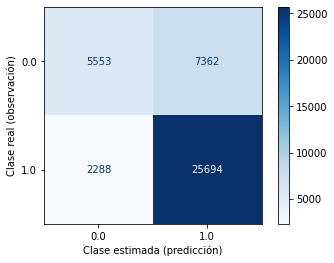

In [38]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_cf.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [39]:
VN, FP, FN, VP = matriz.ravel()
Tasa_FP_1 = FP/(FP+VN)
Tasa_FN_1 = FN/(FN+VP)

print('METRICAS DE DESEMPEÑO | MDL1_CF')
print("--------------------------------------")
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')
print("--------------------------------------")
print("Error tipo I: %.2f" % Tasa_FP_1)
print("Error tipo II: %.2f" % Tasa_FN_1)

METRICAS DE DESEMPEÑO | MDL1_CF
--------------------------------------
Verdaderos positivos (VP): 25694
Falsos positivos (FP): 7362
Verdaderos negativos (VN): 5553
Falsos negativos (FN): 2288
--------------------------------------
Error tipo I: 0.57
Error tipo II: 0.08


In [40]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

         0.0       0.71      0.43      0.54     12915
         1.0       0.78      0.92      0.84     27982

    accuracy                           0.76     40897
   macro avg       0.74      0.67      0.69     40897
weighted avg       0.76      0.76      0.75     40897



In [41]:
SCORE_01 = modelo_cf.score(Xtest,Ytest)
print("ACCURACY: %.2f" % SCORE_01)

#F1-Score
f1_01 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_01)

ACCURACY: 0.76
F1-Score: 0.84


En estas metricas se muestra unos resultados detallados de la calidad del modelo 1. El modelo muestra una precisión razonable en la clasificación de internautas y no internautas, con una precisión, recall y F1-score más altos para la clase de internautas.

#### ➡️MODEL 2 🎄-CLASSIFIER

2️⃣ - `Modelo:`

In [42]:
modelo_cf2 = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2,min_samples_leaf=2,class_weight='balanced')

3️⃣ - `Entrenamiento:`

In [43]:
modelo_cf2.fit(Xtrain, Ytrain)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, n_estimators=50)

4️⃣ - `Predicción:`

In [44]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_cf2.predict(Xtest)

5️⃣ - `Métricas:`

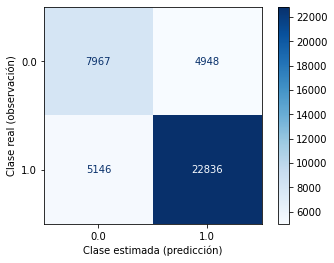

In [45]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_cf2.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [46]:
VN, FP, FN, VP = matriz.ravel()
Tasa_FP_2 = FP/(FP+VN)
Tasa_FN_2 = FN/(FN+VP)

print('METRICAS DE DESEMPEÑO | MDL2_CF')
print("--------------------------------------")
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')
print("--------------------------------------")
print("Error tipo I: %.2f" % Tasa_FP_2)
print("Error tipo II: %.2f" % Tasa_FN_2)

METRICAS DE DESEMPEÑO | MDL2_CF
--------------------------------------
Verdaderos positivos (VP): 22836
Falsos positivos (FP): 4948
Verdaderos negativos (VN): 7967
Falsos negativos (FN): 5146
--------------------------------------
Error tipo I: 0.38
Error tipo II: 0.18


In [47]:
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

         0.0       0.61      0.62      0.61     12915
         1.0       0.82      0.82      0.82     27982

    accuracy                           0.75     40897
   macro avg       0.71      0.72      0.72     40897
weighted avg       0.75      0.75      0.75     40897



In [48]:
#Accuracy
SCORE_02 = modelo_cf2.score(Xtest,Ytest)
print("ACCURACY: %.2f" % SCORE_02)

#F1-Score
f1_02 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_02)

ACCURACY: 0.75
F1-Score: 0.82


#### ➡️MODEL 3 🎄-CLASSIFIER

2️⃣ - `Modelo:`

In [49]:
# Ajuste de hiperparámetros utilizando GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 3, 5,7],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crear una instancia del modelo Random Forest
modelo = RandomForestClassifier(class_weight='balanced', random_state=123)

# Utilizar GridSearchCV para encontrar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(Xtrain, Ytrain)

# Obtener la mejor combinación de hiperparámetros
better_params = grid_search.best_params_
better_params

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [50]:
# Crear un modelo Random Forest con los mejores parámetros
modelo_cf3 = RandomForestClassifier(**better_params, class_weight='balanced')

3️⃣ - `Entrenamiento:` Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [51]:
modelo_cf3.fit(Xtrain, Ytrain)

RandomForestClassifier(class_weight='balanced', min_samples_split=3)

4️⃣ - `Predicción:`

In [52]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_cf3.predict(Xtest)

5️⃣ - `Métricas:`

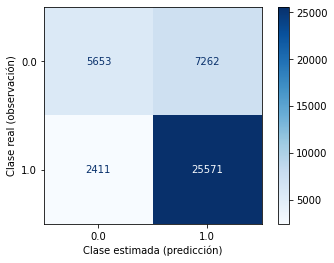

In [53]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_cf3.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [54]:
Tasa_FP_3 = FP/(FP+VN)
Tasa_FN_3 = FN/(FN+VP)

print('METRICAS DE DESEMPEÑO | MDL3_CF')
print("--------------------------------------")
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')
print("--------------------------------------")
print("Error tipo I: %.2f" % Tasa_FP_3)
print("Error tipo II: %.2f" % Tasa_FN_3)

METRICAS DE DESEMPEÑO | MDL3_CF
--------------------------------------
Verdaderos positivos (VP): 22836
Falsos positivos (FP): 4948
Verdaderos negativos (VN): 7967
Falsos negativos (FN): 5146
--------------------------------------
Error tipo I: 0.38
Error tipo II: 0.18


In [55]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

         0.0       0.70      0.44      0.54     12915
         1.0       0.78      0.91      0.84     27982

    accuracy                           0.76     40897
   macro avg       0.74      0.68      0.69     40897
weighted avg       0.75      0.76      0.75     40897



In [56]:
#Accuracy
SCORE_03 = modelo_cf3.score(Xtest,Ytest)
print("ACCURACY: %.2f" % SCORE_03)

#F1-Score
f1_03 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_03)

ACCURACY: 0.76
F1-Score: 0.84
